In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [17]:
df_listings = pd.read_csv('listings.csv')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [18]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48


In [19]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243183 entries, 0 to 243182
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     243183 non-null  int64 
 1   id             243183 non-null  int64 
 2   date           243183 non-null  object
 3   reviewer_id    243183 non-null  int64 
 4   reviewer_name  243183 non-null  object
 5   comments       243165 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.1+ MB


In [20]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


## Clean the data in the listings df

###  Drop unimportant columns

In [21]:
columns_to_be_dropped_listings = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url',
                                 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                                 'bathrooms', 'bathrooms_text', 'calendar_updated', 'has_availability',
                                 'first_review', 'license', 'name', 'neighbourhood_group_cleansed', 'host_location', 'calendar_last_scraped',
                                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                                 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_id'] 

In [22]:
df_listings_cleaned = df_listings.drop(columns_to_be_dropped_listings, axis=1)

In [23]:
df_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   description                                   7411 non-null   object 
 2   neighborhood_overview                         4194 non-null   object 
 3   host_since                                    7566 non-null   object 
 4   host_response_time                            3932 non-null   object 
 5   host_response_rate                            3932 non-null   object 
 6   host_acceptance_rate                          4191 non-null   object 
 7   host_is_superhost                             7566 non-null   object 
 8   host_neighbourhood                            5234 non-null   object 
 9   host_listings_count                           7566 non-null   i

### Split the train/test data based on the price

In [24]:
df_listings_cleaned['price'].value_counts()

$100.00    235
$50.00     234
$150.00    205
$120.00    187
$200.00    184
          ... 
$592.00      1
$599.00      1
$520.00      1
$707.00      1
$857.00      1
Name: price, Length: 547, dtype: int64

In [25]:
df_listings_cleaned['price'] = df_listings_cleaned['price'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\catat\AppData\Local\Temp\ipykernel_15044\1863160517.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings_cleaned['price'] = df_listings_cleaned['price'].str.replace(',', '').str.replace('$', '').astype(float)


<AxesSubplot:>

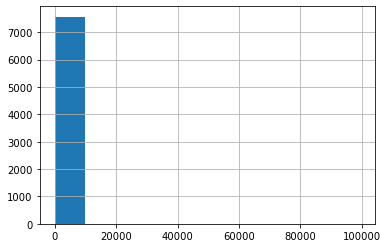

In [26]:
df_listings_cleaned['price'].hist()

In [27]:
df_listings_cleaned["price_cat"] = pd.cut(df_listings_cleaned["price"],
                               bins=[0., 50, 100, 120, 150, 200, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

<AxesSubplot:>

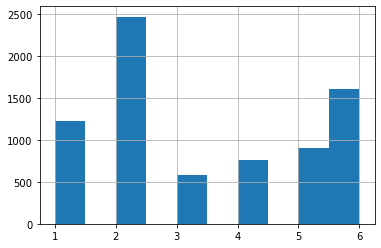

In [28]:

df_listings_cleaned["price_cat"].hist()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_listings_cleaned, df_listings_cleaned["price_cat"]):
    strat_train_set = df_listings_cleaned.loc[train_index]
    strat_test_set = df_listings_cleaned.loc[test_index]

TypeError: split() takes from 3 to 4 positional arguments but 5 were given

In [12]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

2    0.326948
6    0.213342
1    0.161823
5    0.119551
4    0.101057
3    0.077279
Name: price_cat, dtype: float64

In [13]:
df_listings_cleaned["price_cat"].value_counts() / len(df_listings_cleaned)


2    0.326857
6    0.213455
1    0.162041
5    0.119218
4    0.101242
3    0.077187
Name: price_cat, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

In [15]:
strat_test_set.to_csv('test_listing_data')
strat_train_set.to_csv('train_listing_dat')

## Gain insights about data

In [18]:
locations = strat_train_set.copy()

### Visualize Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

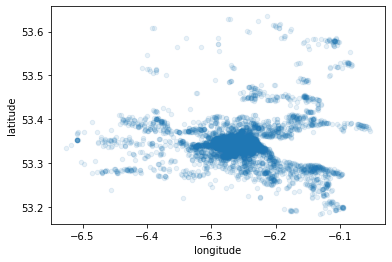

In [19]:


locations.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


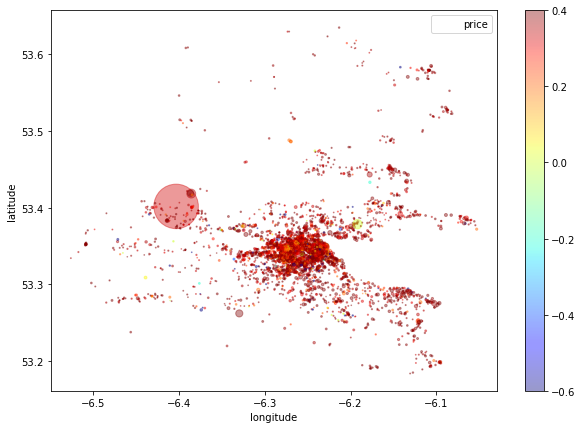

In [20]:
locations.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=locations["price"]/50, label="price", figsize=(10,7),
             c=(locations["review_scores_rating"]-3)/5, cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## study the review distribution 

Text(0, 0.5, 'count')

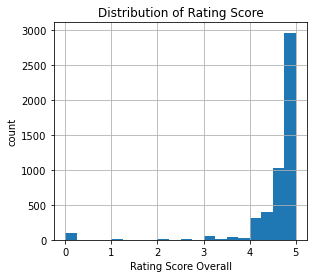

In [21]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

locations.review_scores_rating.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score Overall')
ax1.set_ylabel('count')


Text(0, 0.5, 'count')

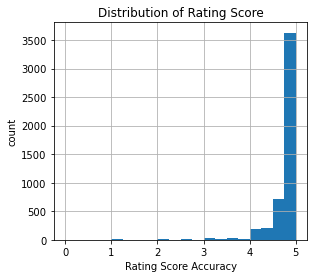

In [22]:


fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

locations.review_scores_accuracy.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score Accuracy')
ax1.set_ylabel('count')

Text(0, 0.5, 'count')

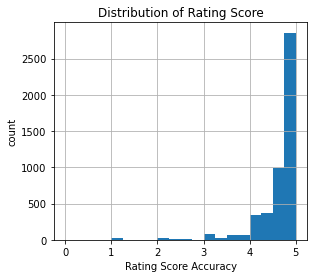

In [23]:


fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

locations.review_scores_cleanliness.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score Accuracy')
ax1.set_ylabel('count')

Text(0, 0.5, 'count')

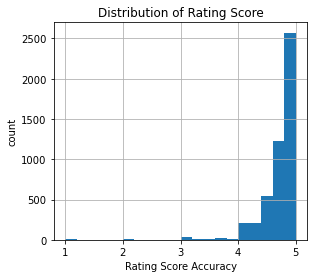

In [24]:

fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

locations.review_scores_location.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score Accuracy')
ax1.set_ylabel('count')

Text(0, 0.5, 'count')

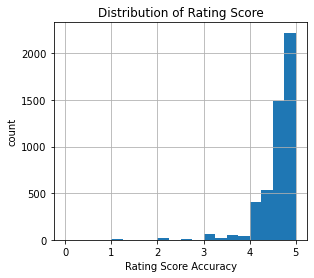

In [25]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

locations.review_scores_value.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Rating Score')
ax1.set_xlabel('Rating Score Accuracy')
ax1.set_ylabel('count')

Most of the data is severly skewed that means this could be turned into a classification problem

### Create a column to split the samples into bin based on the overall number of ratings

In [26]:
mean_ratings = locations['review_scores_rating'].mean()
mean_ratings

4.596460764587512

In [27]:
locations = locations.dropna(subset=['review_scores_rating'])

Put the rating related data into separate lists

In [28]:
r_rating = locations["review_scores_rating"]
r_accuracy = locations["review_scores_accuracy"]
r_chekin = locations["review_scores_checkin"]
r_communication = locations["review_scores_communication"]
r_location = locations["review_scores_location"]
r_value = locations["review_scores_value"]

In [29]:
y_values_to_be_dropped = ["review_scores_rating", "review_scores_accuracy", "review_scores_checkin",
                         "review_scores_communication", "review_scores_location", "review_scores_value"]
locations = locations.drop(y_values_to_be_dropped, axis = 1)
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 4539 to 220
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4970 non-null   int64  
 1   description                                   4886 non-null   object 
 2   neighborhood_overview                         2931 non-null   object 
 3   host_since                                    4970 non-null   object 
 4   host_response_time                            2682 non-null   object 
 5   host_response_rate                            2682 non-null   object 
 6   host_acceptance_rate                          2878 non-null   object 
 7   host_is_superhost                             4970 non-null   object 
 8   host_neighbourhood                            3441 non-null   object 
 9   host_listings_count                           4970 non-null  

### Split the ratings into bins

In [30]:
len(r_rating.head())
r_rating

4539    4.56
3517    5.00
817     0.00
4125    4.77
6669    4.79
        ... 
5791    5.00
5376    4.97
7279    5.00
3905    4.70
220     5.00
Name: review_scores_rating, Length: 4970, dtype: float64

Text(0, 0.5, 'count')

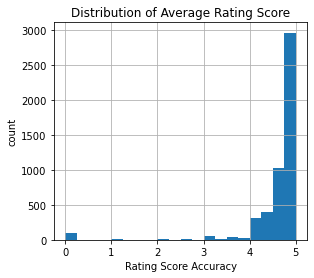

In [31]:
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

r_rating.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Average Rating Score')
ax1.set_xlabel('Rating Score Accuracy')
ax1.set_ylabel('count')

Best decision will be to drop these values all togheter

In [32]:
r_rating_cat = pd.cut(r_rating,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

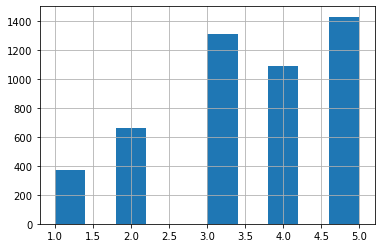

In [33]:
r_rating_cat.hist()

Retrieve textual column information that might be useful at a later point

In [34]:
loc_description = locations['description']
loc_neigh_overview = locations['neighborhood_overview']
locations = locations.drop(['description', 'neighborhood_overview'], axis=1)
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 4539 to 220
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4970 non-null   int64  
 1   host_since                                    4970 non-null   object 
 2   host_response_time                            2682 non-null   object 
 3   host_response_rate                            2682 non-null   object 
 4   host_acceptance_rate                          2878 non-null   object 
 5   host_is_superhost                             4970 non-null   object 
 6   host_neighbourhood                            3441 non-null   object 
 7   host_listings_count                           4970 non-null   int64  
 8   host_total_listings_count                     4970 non-null   int64  
 9   host_verifications                            4970 non-null  

## Feature engineering for the other fields

transform host_since in the number of days of experience as a host

In [35]:
import datetime
now = datetime.datetime.now()
#print(now - locations.iloc[1]['host_since'])
locations['new_date'] = pd.to_datetime(locations['host_since'].astype(str), format='%Y-%m-%d')

In [36]:
print(now - locations.iloc[1]['new_date'])

1814 days 08:39:02.225470


In [37]:
locations = locations.drop(['host_since'], axis=1)


In [38]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 4539 to 220
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4970 non-null   int64         
 1   host_response_time                            2682 non-null   object        
 2   host_response_rate                            2682 non-null   object        
 3   host_acceptance_rate                          2878 non-null   object        
 4   host_is_superhost                             4970 non-null   object        
 5   host_neighbourhood                            3441 non-null   object        
 6   host_listings_count                           4970 non-null   int64         
 7   host_total_listings_count                     4970 non-null   int64         
 8   host_verifications                            4970 non-null   obje

host_response_time

In [39]:
locations["host_response_time"].value_counts()

within an hour        1820
within a few hours     502
within a day           316
a few days or more      44
Name: host_response_time, dtype: int64

In [40]:
locations["host_response_time"].fillna("unknown", inplace  = True)
locations["host_response_time"].value_counts()

unknown               2288
within an hour        1820
within a few hours     502
within a day           316
a few days or more      44
Name: host_response_time, dtype: int64

In [41]:
host_response_cat = locations[["host_response_time"]]
host_response_cat.head(10)

,host_response_time
4539,within an hour
3517,unknown
817,unknown
4125,unknown
6669,within an hour
1943,unknown
2532,within an hour
2432,unknown
5180,within a few hours
3650,within a day


In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(host_response_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

host_response_rate

In [43]:
locations["host_response_rate"] = locations["host_response_rate"].fillna("0%")

In [44]:
locations["host_response_rate"] = locations["host_response_rate"].str.replace("%", "").astype(int)

In [45]:
locations["host_response_rate"] = locations["host_response_rate"].replace(0, np.NaN)
host_response_time_median = locations["host_response_rate"].median()
locations["host_response_rate"].fillna(host_response_time_median, inplace=True) # option 3

host_acceptance_rate

In [46]:
locations["host_acceptance_rate"].value_counts()

100%    867
99%     198
98%     166
96%     109
97%     101
       ... 
9%        1
24%       1
8%        1
14%       1
28%       1
Name: host_acceptance_rate, Length: 90, dtype: int64

In [47]:
locations["host_acceptance_rate"] = locations["host_acceptance_rate"].fillna("0%")

In [48]:
locations["host_acceptance_rate"] = locations["host_acceptance_rate"].str.replace("%", "").astype(int)

In [49]:
locations["host_acceptance_rate"] = locations["host_acceptance_rate"].replace(0, np.NaN)
host_acceptance_rate_median = locations["host_acceptance_rate"].median()
locations["host_acceptance_rate"].fillna(host_acceptance_rate_median, inplace=True) # option 3

In [50]:
locations["host_acceptance_rate"] 

4539    100.0
3517    100.0
817     100.0
4125    100.0
6669     97.0
        ...  
5791     58.0
5376     75.0
7279    100.0
3905    100.0
220      40.0
Name: host_acceptance_rate, Length: 4970, dtype: float64

host_is_superhost

In [51]:
locations["host_is_superhost"] = (locations["host_is_superhost"] == 't').astype(int)

In [52]:
locations["host_is_superhost"].value_counts()

0    4217
1     753
Name: host_is_superhost, dtype: int64

host_neighborhood

In [53]:
locations = locations.drop(["host_neighbourhood"], axis=1)

host_listings_count

In [54]:
print(locations["host_listings_count"].value_counts())
print("================================================")
locations["host_total_listings_count"].value_counts()

1       2686
2        827
3        400
4        170
5        162
6         68
8         65
12        61
10        60
7         51
9         45
55        44
11        37
68        32
21        25
23        25
2157      24
32        24
16        23
17        23
38        17
87        14
13        12
24        11
15        11
19        10
18        10
14         9
20         6
327        3
26         3
144        3
949        2
154        2
22         2
71         1
29         1
1327       1
Name: host_listings_count, dtype: int64


1       1938
2        974
3        523
4        302
5        241
6        105
7         95
8         94
12        65
10        49
137       44
9         43
13        40
22        37
30        31
14        31
129       30
21        28
11        25
3311      24
41        24
15        20
18        17
80        17
16        15
143       14
36        13
17        12
23        10
56        10
29        10
43         9
35         8
59         8
87         7
24         7
54         6
19         5
25         4
38         4
28         3
251        3
395        3
32         3
127        3
1834       2
117        2
218        2
39         2
26         2
2307       1
33         1
44         1
20         1
800        1
70         1
Name: host_total_listings_count, dtype: int64

host_verifications

In [55]:
print(locations["host_verifications"].value_counts())

['email', 'phone']                  3917
['email', 'phone', 'work_email']     623
['phone']                            396
['phone', 'work_email']               21
['email']                              7
[]                                     5
['email', 'work_email']                1
Name: host_verifications, dtype: int64


In [56]:
host_verification_cat = locations[["host_verifications"]]

In [57]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(host_verification_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

host_has_profile_pic

In [58]:
locations["host_has_profile_pic"] = (locations["host_has_profile_pic"] == 't').astype(int)

In [59]:
locations["host_has_profile_pic"].value_counts()

1    4916
0      54
Name: host_has_profile_pic, dtype: int64

host_identity_verified

In [60]:
locations["host_identity_verified"] = (locations["host_identity_verified"] == 't').astype(int)

In [61]:
locations["host_identity_verified"].value_counts()

1    3875
0    1095
Name: host_identity_verified, dtype: int64

neighbourhood 

In [62]:
locations["neighbourhood"].value_counts()

Dublin, County Dublin, Ireland       763
Dublin, Ireland                      349
Dublin 8, County Dublin, Ireland     201
Dublin 1, County Dublin, Ireland     150
Dublin 4, County Dublin, Ireland      80
                                    ... 
Clontarf , County Dublin, Ireland      1
Dublin 1 /Ireland, Ireland             1
Dublin 7, Leinster, Ireland            1
Donabate, Co Dublin, Ireland           1
Kildare, Ireland                       1
Name: neighbourhood, Length: 337, dtype: int64

In [63]:
locations["neighbourhood"] = locations["neighbourhood"].str.replace(", Ireland", "")

In [64]:
locations["neighbourhood"].value_counts()

Dublin, County Dublin       763
Dublin                      349
Dublin 8, County Dublin     201
Dublin 1, County Dublin     150
Dublin 4, County Dublin      80
                           ... 
Clontarf , County Dublin      1
Dublin 1 /Ireland             1
Dublin 7, Leinster            1
Donabate, Co Dublin           1
Kildare                       1
Name: neighbourhood, Length: 337, dtype: int64

In [65]:
locations["neighbourhood"] = locations["neighbourhood"].str.replace(", County", "")

In [66]:
locations["neighbourhood"].value_counts()

Dublin Dublin          763
Dublin                 349
Dublin 8 Dublin        201
Dublin 1 Dublin        150
Dublin 4 Dublin         80
                      ... 
Clontarf  Dublin         1
Dublin 1 /Ireland        1
Dublin 7, Leinster       1
Donabate, Co Dublin      1
Kildare                  1
Name: neighbourhood, Length: 337, dtype: int64

In [67]:
locations["neighbourhood"] = locations["neighbourhood"].str.replace("Ireland", "")

In [68]:
locations["neighbourhood"].value_counts()

Dublin Dublin          763
Dublin                 349
Dublin 8 Dublin        201
Dublin 1 Dublin        150
Dublin 4 Dublin         80
                      ... 
Clontarf  Dublin         1
Dublin 1 /               1
Dublin 7, Leinster       1
Donabate, Co Dublin      1
Kildare                  1
Name: neighbourhood, Length: 337, dtype: int64

In [69]:
locations["neighbourhood"] = locations["neighbourhood"].str.replace("Dublin", "")

In [70]:
locations["neighbourhood"].value_counts()

                 765
                 354
 8               202
 1               150
 4                80
                ... 
Clontarf           1
 1 /               1
 7, Leinster       1
Donabate, Co       1
Kildare            1
Name: neighbourhood, Length: 333, dtype: int64

In [71]:
def contains_number(string):
    return any(char.isdigit() for char in string)

for index, row in locations.iterrows():
    txt = row["neighbourhood"]
    num = 0
    if contains_number(str(txt)):
        num_list = [int(s) for s in str(txt).split() if s.isdigit()]
        num = num_list[0] if len(num_list) >= 1 else 0
    
    locations.at[index, "neighbourhood"] = num
        
        
locations["neighbourhood"].value_counts()

0     4086
8      210
1      158
4       88
7       78
6       73
2       73
13      31
14      23
3       23
5       22
9       18
18      16
10      13
16      12
11      11
15      11
22       9
24       7
12       6
20       1
17       1
Name: neighbourhood, dtype: int64

neighbourhood_cleansed

In [72]:
locations["neighbourhood_cleansed"].value_counts()

Dublin City              3671
Dn Laoghaire-Rathdown     564
Fingal                    508
South Dublin              227
Name: neighbourhood_cleansed, dtype: int64

property_type

In [73]:
locations["property_type"].value_counts()

Entire rental unit                    1040
Private room in home                   961
Private room in rental unit            736
Entire home                            695
Entire condo                           366
Private room in condo                  224
Private room in townhouse              181
Entire townhouse                       156
Private room in bed and breakfast       71
Entire serviced apartment               49
Shared room in rental unit              42
Entire cottage                          40
Entire guest suite                      37
Entire guesthouse                       35
Private room in bungalow                30
Room in boutique hotel                  29
Shared room in home                     28
Room in hotel                           28
Entire bungalow                         24
Entire loft                             22
Private room in guest suite             17
Room in hostel                          14
Shared room in condo                    12
Private roo

In [74]:
locations["room_type"].value_counts()

Entire home/apt    2509
Private room       2340
Shared room          87
Hotel room           34
Name: room_type, dtype: int64

accommodates

In [75]:
locations["accommodates"].value_counts()

2     2389
4      884
1      590
6      344
3      293
5      230
8       91
7       84
10      25
9       15
12       9
16       5
11       5
14       4
13       1
15       1
Name: accommodates, dtype: int64

amenities

In [76]:
locations["amenities"].value_counts()

["Essentials", "Hot water kettle", "Refrigerator", "Oven", "Bed linens", "Hangers", "Lock on bedroom door", "Wifi", "Long term stays allowed", "Heating", "Smoke alarm", "Kitchen", "Dishes and silverware", "Dedicated workspace", "Stove", "Microwave", "Shampoo", "Hot water"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              15
["Long term stays allowed"]                                                                                                                                           

In [77]:
for index, row in locations.iterrows():
    lst = row["amenities"]
    locations.at[index, "amenities"] = len(lst)
        
        
locations["amenities"].value_counts()

147     24
273     22
199     22
252     21
217     19
        ..
1360     1
871      1
745      1
885      1
481      1
Name: amenities, Length: 960, dtype: int64

In [78]:
locations["amenities"] = locations["amenities"].astype(int)

availability_

In [79]:
locations["availability_30"].value_counts()

0     3304
2      191
1      160
3      132
4      113
6      103
5      100
7       99
11      80
10      78
8       72
9       70
13      54
15      52
12      50
17      38
14      32
20      27
16      27
18      26
23      24
19      23
22      22
24      18
21      17
25      15
27      14
29      11
26       7
28       6
30       5
Name: availability_30, dtype: int64

number_of_reviews

In [80]:
locations["number_of_reviews"].value_counts()

1      615
2      407
3      296
4      233
5      215
      ... 
175      1
248      1
514      1
451      1
272      1
Name: number_of_reviews, Length: 325, dtype: int64

last_review

In [81]:
locations["last_review"].value_counts()

2022-08-28    151
2022-09-11    132
2022-09-10    123
2022-09-04    110
2022-08-29     97
             ... 
2018-04-26      1
2019-01-21      1
2018-11-12      1
2020-07-19      1
2020-08-13      1
Name: last_review, Length: 1316, dtype: int64

In [82]:
now = datetime.datetime.now()
locations['days_since_last_review'] = pd.to_datetime(locations['last_review'].astype(str), format='%Y-%m-%d')

In [83]:
locations['days_since_last_review'] = now - locations['days_since_last_review']

In [84]:
locations['days_since_last_review'] = locations['days_since_last_review'].dt.days


In [85]:
locations['days_since_last_review'].value_counts()

115     151
101     132
102     123
108     110
114      97
       ... 
1700      1
1430      1
1500      1
885       1
860       1
Name: days_since_last_review, Length: 1316, dtype: int64

In [86]:
locations['new_date'] = now - locations['new_date']

In [87]:
locations['new_date'] = locations['new_date'].dt.days
locations['new_date'].value_counts()

2807    46
2426    34
2054    27
4481    24
3239    18
        ..
1541     1
393      1
4361     1
3031     1
3373     1
Name: new_date, Length: 2085, dtype: int64

In [88]:
#locations = locations.drop(["last_review"], axis=1)

review_scores_cleanliness

In [89]:
locations['review_scores_cleanliness'].value_counts()

5.00    1277
4.00     214
4.50     171
4.67     141
4.75     119
        ... 
2.43       1
3.71       1
3.87       1
3.82       1
3.64       1
Name: review_scores_cleanliness, Length: 148, dtype: int64

In [90]:
locations = locations.drop(["review_scores_cleanliness"], axis=1)

instant_bookable

In [91]:
locations['instant_bookable'].value_counts()

f    3125
t    1845
Name: instant_bookable, dtype: int64

In [92]:
locations["instant_bookable"] = (locations["instant_bookable"] == 't').astype(int)

calculated_host_listings_count

In [93]:
locations['calculated_host_listings_count'].value_counts()

1     2898
2      774
3      351
5      162
4      152
6       71
8       67
7       59
10      55
9       53
55      44
12      41
42      30
11      27
66      24
31      24
15      21
13      20
14      20
38      17
20      17
48      14
17      13
23      10
19       6
Name: calculated_host_listings_count, dtype: int64

In [94]:
locations = locations.drop(["calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                           "calculated_host_listings_count_shared_rooms"], axis=1)

reviews_per_month

In [95]:
locations['reviews_per_month'].value_counts()

0.02     222
0.03     170
1.00     133
0.06     123
0.08     115
        ... 
7.80       1
9.39       1
36.09      1
3.61       1
6.79       1
Name: reviews_per_month, Length: 626, dtype: int64

## Transformation pipelines for categorical and numerical values

In [96]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 4539 to 220
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4970 non-null   int64  
 1   host_response_time              4970 non-null   object 
 2   host_response_rate              4970 non-null   float64
 3   host_acceptance_rate            4970 non-null   float64
 4   host_is_superhost               4970 non-null   int32  
 5   host_listings_count             4970 non-null   int64  
 6   host_total_listings_count       4970 non-null   int64  
 7   host_verifications              4970 non-null   object 
 8   host_has_profile_pic            4970 non-null   int32  
 9   host_identity_verified          4970 non-null   int32  
 10  neighbourhood                   4970 non-null   object 
 11  neighbourhood_cleansed          4970 non-null   object 
 12  latitude                        

In [103]:
locations = locations.drop(['last_review', 'id'], axis=1)

In [105]:
locations_cat = ["host_response_time", "host_verifications", "neighbourhood", "neighbourhood_cleansed", "property_type", "room_type"]
locations_num = list(locations.drop(locations_cat, axis=1))

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [107]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [108]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, locations_num),
        ("cat", OneHotEncoder(), locations_cat),
    ])

In [109]:
locations_prepared = full_pipeline.fit_transform(locations)

In [110]:
locations_prepared.shape

(4970, 127)

## Select and train a model

In [ ]:
r_rating_cat.fillna(1)

In [111]:

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [112]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
ratings_transformed = lab.fit_transform(r_rating_cat)

#view transformed values
print(ratings_transformed)


[2 4 5 ... 4 2 4]


In [113]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model.fit(locations_prepared, r_rating_cat)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, locations_prepared, ratings_transformed, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.450 (0.013)


In [114]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(locations_prepared, ratings_transformed)

SGDClassifier(random_state=42)

In [115]:
cross_val_score(sgd_clf, locations_prepared, ratings_transformed, cv=3, scoring="accuracy")

array([0.4031382 , 0.38382619, 0.37862319])

In [116]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
n_scores = cross_val_score(classifier, locations_prepared, ratings_transformed, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.455 (0.019)


## Try to have 4 categories instead of 5

In [130]:
r_rating_cat = pd.cut(r_rating,
                      bins=[0., 4., 4.5, 4.8, 5],
                      labels=[1, 2, 3, 4])

In [131]:
r_rating_cat.fillna(1)

4539    3
3517    4
817     1
4125    3
6669    3
       ..
5791    4
5376    4
7279    4
3905    3
220     4
Name: review_scores_rating, Length: 4970, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

<AxesSubplot:>

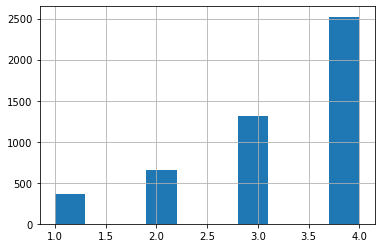

In [132]:
r_rating_cat.hist()

In [123]:
lab = preprocessing.LabelEncoder()
ratings_transformed = lab.fit_transform(r_rating_cat)

#view transformed values
print(ratings_transformed)

[2 3 4 ... 3 2 3]


In [125]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, locations_prepared, ratings_transformed, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.530 (0.014)


In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
n_scores = cross_val_score(classifier, locations_prepared, ratings_transformed, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.540 (0.018)


## Compare performance with baseline classifier

In [134]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier


clf = DummyClassifier(strategy='stratified')
clf.fit(locations_prepared, ratings_transformed)

DummyClassifier(strategy='stratified')

In [136]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(locations_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed)
print(round(acc*100, 2), "%", sep="")

36.02%


In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier2.fit(locations_prepared, ratings_transformed)
y_pred_train = classifier2.predict(locations_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed)
print(round(acc*100, 2), "%", sep="")

98.43%


In [141]:
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model2.fit(locations_prepared, ratings_transformed)
y_pred_train = model2.predict(locations_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed)
print(round(acc*100, 2), "%", sep="")

55.47%


C:\Users\catat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test the Random Forrest Classifier on the test data

In [143]:
r_rating_cat_2 = pd.cut(r_rating,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

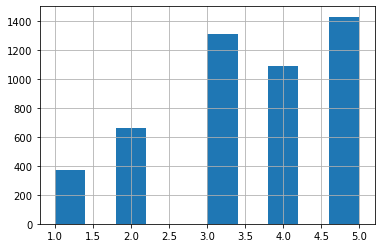

In [144]:
r_rating_cat_2.hist()

In [148]:
lab = preprocessing.LabelEncoder()
ratings_transformed_2 = lab.fit_transform(r_rating_cat_2)

#view transformed values
print(ratings_transformed_2)

[2 4 5 ... 4 2 4]


In [149]:
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier3.fit(locations_prepared, ratings_transformed_2)
y_pred_train = classifier3.predict(locations_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed)
print(round(acc*100, 2), "%", sep="")

98.67%


In [151]:
clf_dummy = DummyClassifier(strategy='stratified')
clf_dummy.fit(locations_prepared, ratings_transformed_2)

DummyClassifier(strategy='stratified')

In [152]:
y_pred_train = clf_dummy.predict(locations_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed)
print(round(acc*100, 2), "%", sep="")

22.78%


##  Save the forrest model and the test data on the disk

In [153]:
#import pickle
#filename = 'finalized_forrest_model.sav'
#pickle.dump(classifier3, open(filename, 'wb'))

In [155]:
#strat_test_set.to_csv('test_data')

In [157]:
#locations_prepared

<4970x127 sparse matrix of type '<class 'numpy.float64'>'
	with 168980 stored elements in Compressed Sparse Row format>